In [2]:
%matplotlib inline
%run 'bin/notebook_utils.py'

/home/merzky/radical/radical.analytics.devel/ve/local/lib/python2.7/site-packages/radical/utils/atfork/stdlib_fixer.py:63: UserWarning: logging module already imported before fixup.
  warnings.warn('logging module already imported before fixup.')


In [14]:
prof_csv = '../rawdata/profiler_overhead/profiler_data.csv'

all_df = pd.read_csv(prof_csv)
print all_df

prof_df  = all_df.loc[all_df['cfg'] == 5]
plain_df = all_df.loc[all_df['cfg'] == 6]

print prof_df['ttc'].values
print plain_df['ttc'].values


                                  #sid  cfg     ttc
0   profiler_titan_512_32_16384_60_5.0    5  1008.4
1   profiler_titan_512_32_16384_60_5.1    5  1080.1
2   profiler_titan_512_32_16384_60_5.3    5  1077.8
3   profiler_titan_512_32_16384_60_5.8    5  1018.9
4   profiler_titan_512_32_16384_60_5.9    5  1042.3
5   profiler_titan_512_32_16384_60_6.0    6  1052.9
6   profiler_titan_512_32_16384_60_6.1    6   999.0
7   profiler_titan_512_32_16384_60_6.2    6  1022.4
8   profiler_titan_512_32_16384_60_6.3    6  1040.5
9   profiler_titan_512_32_16384_60_6.4    6  1046.9
10  profiler_titan_512_32_16384_60_6.5    6  1032.6
11  profiler_titan_512_32_16384_60_6.6    6  1089.5
12  profiler_titan_512_32_16384_60_6.7    6  1144.9
13  profiler_titan_512_32_16384_60_6.8    6  1147.4
14  profiler_titan_512_32_16384_60_6.9    6  1116.2
[ 1008.4  1080.1  1077.8  1018.9  1042.3]
[ 1052.9   999.   1022.4  1040.5  1046.9  1032.6  1089.5  1144.9  1147.4
  1116.2]


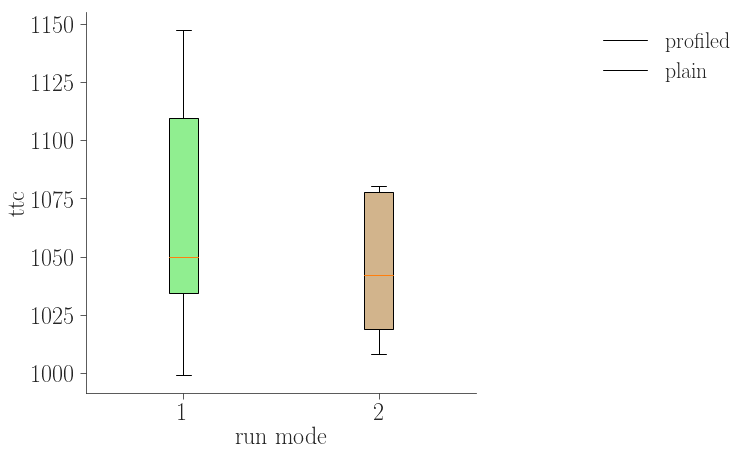

In [31]:

# plot time spent in
#  - reading the unit's resource requiremeents
#  - finding suitable resources
#  - recording the findings (in the schedule data structure and in the unit)


fig, ax  = fig_setup(figsize=(7,7))
ssize    = 4096

box = plt.boxplot([plain_df['ttc'].values, prof_df['ttc'].values], patch_artist=True)

colors = ['lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set(facecolor=color)       

    
plt.legend(loc='upper right', bbox_to_anchor=(1.7,1), labels=['profiled', 'plain'])
plt.xlabel('run mode')
plt.ylabel('ttc')

plt.savefig('figures/paper_titan_rp_profiler_overhead.pdf', dpi=300, bbox_inches='tight')

In [ ]:
alpha=0.5